In [81]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")

In [82]:
#read the csv file
dataset = pd.read_csv('CardioGoodFitness-1.csv')
dataset

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [83]:
#Define a function to accept data path 
def customer_data(path):
#open file
    csv_file =open (path,"r")
    csv_reader = csv.DictReader(csv_file)
    
    return csv_reader

In [85]:
csv_reader =customer_data("./CardioGoodFitness-1.csv")
for row in csv_reader:
    print(row)

{'Product': 'TM195', 'Age': '18', 'Gender': 'Male', 'Education': '14', 'MaritalStatus': 'Single', 'Usage': '3', 'Fitness': '4', 'Income': '29562', 'Miles': '112'}
{'Product': 'TM195', 'Age': '19', 'Gender': 'Male', 'Education': '15', 'MaritalStatus': 'Single', 'Usage': '2', 'Fitness': '3', 'Income': '31836', 'Miles': '75'}
{'Product': 'TM195', 'Age': '19', 'Gender': 'Female', 'Education': '14', 'MaritalStatus': 'Partnered', 'Usage': '4', 'Fitness': '3', 'Income': '30699', 'Miles': '66'}
{'Product': 'TM195', 'Age': '19', 'Gender': 'Male', 'Education': '12', 'MaritalStatus': 'Single', 'Usage': '3', 'Fitness': '3', 'Income': '32973', 'Miles': '85'}
{'Product': 'TM195', 'Age': '20', 'Gender': 'Male', 'Education': '13', 'MaritalStatus': 'Partnered', 'Usage': '4', 'Fitness': '2', 'Income': '35247', 'Miles': '47'}
{'Product': 'TM195', 'Age': '20', 'Gender': 'Female', 'Education': '14', 'MaritalStatus': 'Partnered', 'Usage': '3', 'Fitness': '3', 'Income': '32973', 'Miles': '66'}
{'Product': 'T

In [90]:
def nested_data(CardioGoodFitness_1):
    # store all nested data into a list called the converted_data
    with open("./CardioGoodFitness-1.csv", "r") as csv_file:
        csv_reader = csv.DictReader(csv_file, delimiter=',') 
        converted_data = []
        for row in csv_reader:
            restructured_rows = {
                "product": row["Product"],
                "age": row["Age"],
                "gender": row["Gender"],
                "education": row["Education"],
                "marital_status": row["MaritalStatus"],
                "usage": row["Usage"],
                "fitness": row["Fitness"],
                "income": row["Income"],
                "miles": row["Miles"],
            }
            converted_data.append(restructured_rows)

    return converted_data

processed_data = nested_data("./CardioGoodFitness-1.csv")

In [91]:
processed_data

[{'product': 'TM195',
  'age': '18',
  'gender': 'Male',
  'education': '14',
  'marital_status': 'Single',
  'usage': '3',
  'fitness': '4',
  'income': '29562',
  'miles': '112'},
 {'product': 'TM195',
  'age': '19',
  'gender': 'Male',
  'education': '15',
  'marital_status': 'Single',
  'usage': '2',
  'fitness': '3',
  'income': '31836',
  'miles': '75'},
 {'product': 'TM195',
  'age': '19',
  'gender': 'Female',
  'education': '14',
  'marital_status': 'Partnered',
  'usage': '4',
  'fitness': '3',
  'income': '30699',
  'miles': '66'},
 {'product': 'TM195',
  'age': '19',
  'gender': 'Male',
  'education': '12',
  'marital_status': 'Single',
  'usage': '3',
  'fitness': '3',
  'income': '32973',
  'miles': '85'},
 {'product': 'TM195',
  'age': '20',
  'gender': 'Male',
  'education': '13',
  'marital_status': 'Partnered',
  'usage': '4',
  'fitness': '2',
  'income': '35247',
  'miles': '47'},
 {'product': 'TM195',
  'age': '20',
  'gender': 'Female',
  'education': '14',
  'mar

In [3]:
#Check the information of the dataset to see the columns, null values and data type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [4]:
#Check the rows and columns
dataset.shape

(180, 9)

In [5]:
#Check the statistics of the numeric values 
dataset.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [6]:
#Check the first 5 rows
dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [7]:
#Check the column names
dataset.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<AxesSubplot:>

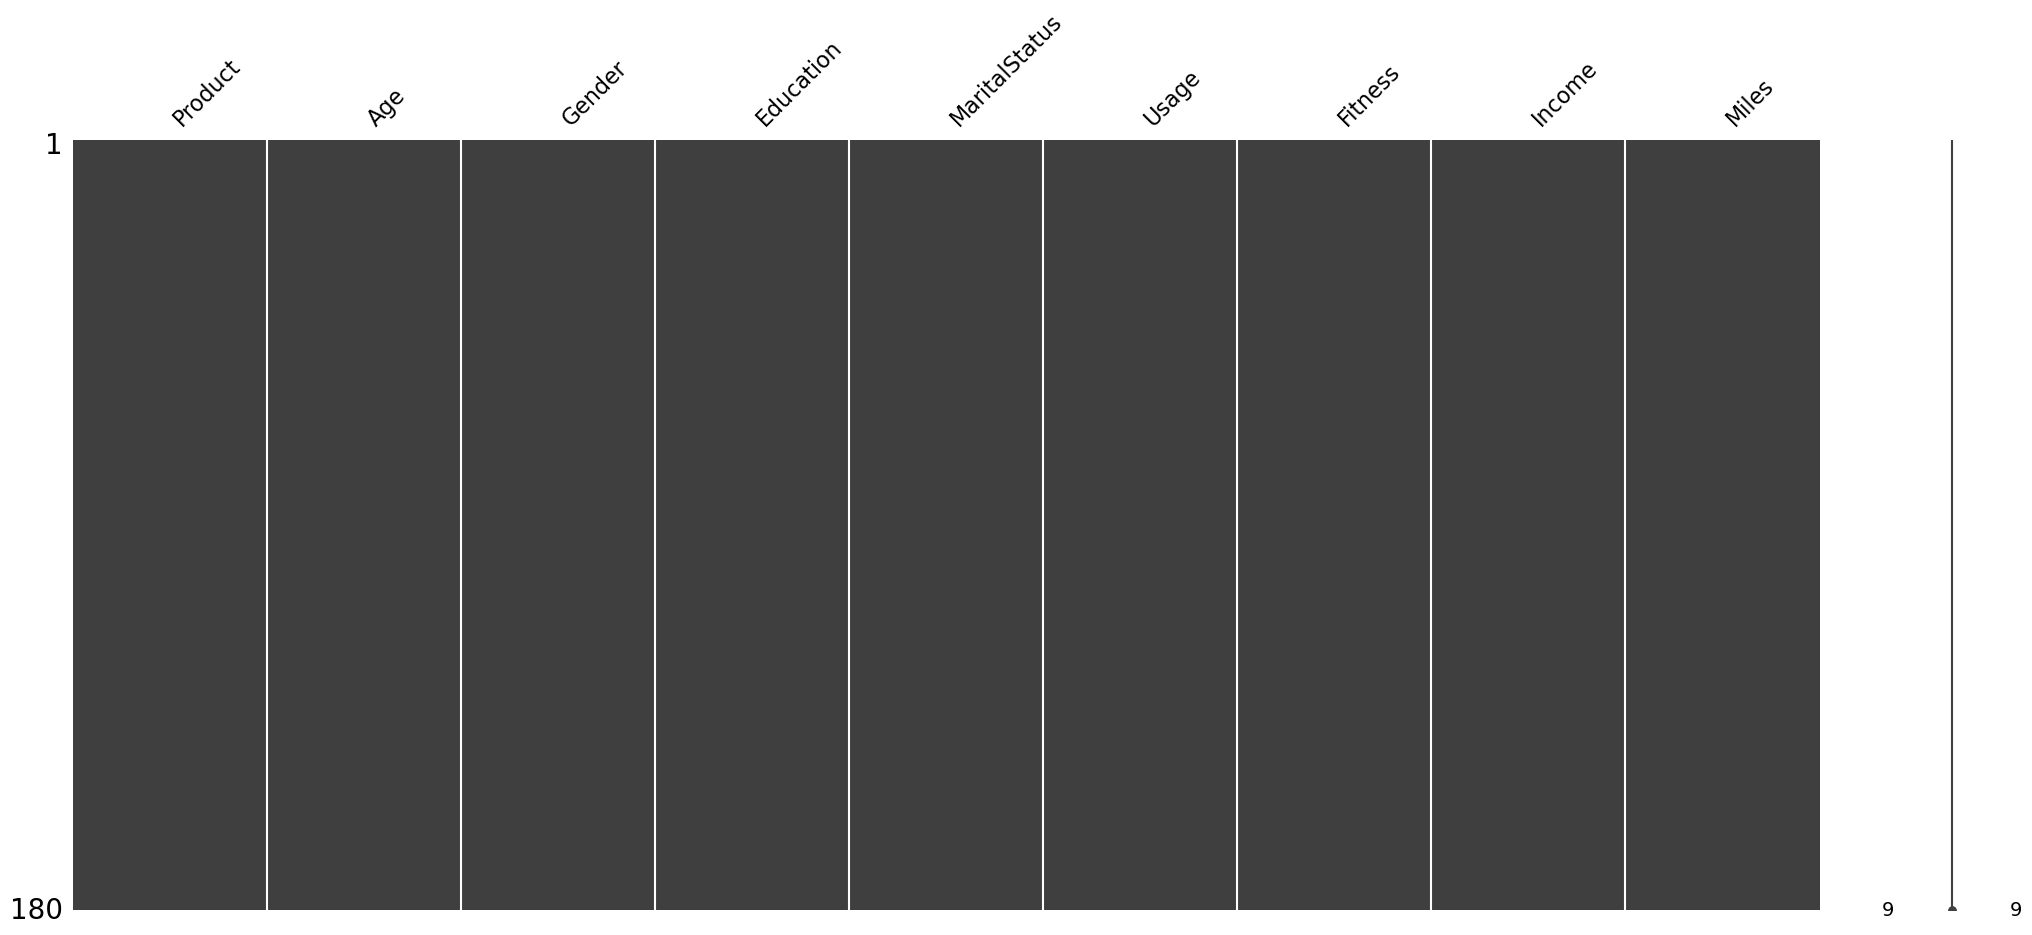

In [8]:
#Check the missing numbers using missingno
import missingno as msno
msno.matrix(dataset)

# PRODUCT

In [9]:
#Check the unique values in the product column
dataset['Product'].unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [10]:
#Check the number of unique values in the product column
dataset['Product'].nunique()

3

In [11]:
#to check if there is an empty string
dataset[(dataset['Product'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [12]:
#check the count of each of the unique values
dataset['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [13]:
#Check the details of the product column
dataset['Product'].describe()

count       180
unique        3
top       TM195
freq         80
Name: Product, dtype: object

# AGE

In [14]:
#Check the unique values in the Age column
dataset['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [15]:
#Check the number of unique values in the age column
dataset['Age'].nunique()

32

In [16]:
#to check if there is an empty string
dataset[(dataset['Age'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [17]:
#check the count of each of the unique values
dataset['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [18]:
#check the stastical values of the Age column
dataset['Age'].describe()

count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
Name: Age, dtype: float64

Comment:
Count: the number of non-missing values in the "Age" column which is total of 180.

mean: the average value of the "Age" column is 28.788889

std: the standard deviation of the "Age" column, which measures how spread out the values are from the mean which is 6.943498

min: the smallest value in the "Age" column which is 18 years

25%: the value below which 25% of the values in the "Age" column fall (also known as the first quartile), which means 25% of the people in the dataset are less than or equal to 24years

50%: the median value of the "Age" column, which is the value that separates the lower 50% of the values from the upper 50% of the values, which means 50% of the people in the dataset are less than or equal to 26years

75%: the value below which 75% of the values in the "Age" column fall (also known as the third quartile),which means 75% of the people in the dataset are less than or equal to 33years

max: the largest value in the "Age" column, which is 50 years

# GENDER

In [19]:
#Check the unique values in the Gender column
dataset['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
#Check the number of unique values in the Gender column
dataset['Gender'].nunique()

2

In [21]:
#to check if there is an empty string
dataset[(dataset['Gender'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [22]:
#check the count of each of the unique values
dataset['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [23]:
#Check the details of the Gender column
dataset['Gender'].describe()

count      180
unique       2
top       Male
freq       104
Name: Gender, dtype: object

# EDUCATION

In [24]:
#Check the unique values in the Education column
dataset['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [25]:
#Check the number of unique values in the Education column
dataset['Education'].nunique()

8

In [26]:
#to check if there is an empty string
dataset[(dataset['Education'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [27]:
#check the count of each of the unique values
dataset['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [28]:
#check the stastical values of the Education column
dataset['Education'].describe()

count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
Name: Education, dtype: float64

Comment:
Count: the number of non-missing values in the "Education" column which is total of 180.

mean: the average value of the "Education" column is 15.572222

std: the standard deviation of the "Education" column, which measures how spread out the values are from the mean which is  1.617055

min: the smallest value in the "Education" column which is 12

25%: the value below which 25% of the values in the "Education" column fall (also known as the first quartile), which means 25% of the people in the dataset are less than or equal to 14 people

50%: the median value of the "Education" column, which is the value that separates the lower 50% of the values from the upper 50% of the values, which means 50% of the people in the dataset are less than or equal to 16 people

75%: the value below which 75% of the values in the "Education" column fall (also known as the third quartile),which means 75% of the people in the dataset are less than or equal to 16 people

max: the largest value in the "Education" column, which is 21 people

# MARITALSTATUS

In [29]:
#Check the unique values in the MaritalStatus column
dataset['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [30]:
#Check the number of unique values in the MaritalStatus column
dataset['MaritalStatus'].nunique()

2

In [31]:
#to check if there is an empty string
dataset[(dataset['MaritalStatus'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [32]:
#Check the count of unique values in the MaritalStatus column
dataset['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [33]:
#Check the details of the MaritalStatus Column
dataset['MaritalStatus'].describe()

count           180
unique            2
top       Partnered
freq            107
Name: MaritalStatus, dtype: object

# USAGE

In [34]:
#Check the unique values in the Usage column
dataset['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [35]:
#Check the statistics  in the Usage column
dataset['Usage'].describe()

count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
Name: Usage, dtype: float64

Count: 180.000000 means there are 180 observations in the dataset for the variable "Usage".

Mean: 3.455556 means the average value of the "Usage" variable is 3.455556.

Std: 1.084797 is the standard deviation of the "Usage" variable, which is a measure of the amount of variation or dispersion in the data.

Min: 2.000000 is the minimum value of the "Usage" variable.

25%: 3.000000 is the first quartile, which means 25% of the observations in the dataset have a "Usage" value less than or equal to 3.

50%: 3.000000 is the second quartile or median, which means 50% of the observations in the dataset have a "Usage" value less than or equal to 3.

75%: 4.000000 is the third quartile, which means 75% of the observations in the dataset have a "Usage" value less than or equal to 4.

Max: 7.000000 is the maximum value of the "Usage" variable.

In [36]:
#Check the number of unique values in the Usage column
dataset['Usage'].nunique()

6

In [37]:
#Check the counts of the unique values in the Usage Column
dataset['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [38]:
#to check if there is an empty string
dataset[(dataset['Usage'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


# FITNESS

In [39]:
#Check the unique values in the Fitness column
dataset['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

In [40]:
#Check the number of unique values in the Fitness column
dataset['Fitness'].nunique()

5

In [41]:
#Check for the stastical values in the Fitness column
dataset['Fitness'].describe()

count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Fitness, dtype: float64

count: There are 180 counts in the dataset for the "Fitness" column.

mean: The mean (average) value of "Fitness" across all 180 counts is 3.311111.

std: The standard deviation of "Fitness" across all 180 counts is 0.958869. This gives a sense of how much the values tend to vary from the mean.

min: The minimum value of "Fitness" in the dataset is 1.000000.

25%: The 25th percentile value of "Fitness" is 3.000000. This means that 25% of the dataset have a "Fitness" value of 3 or less.

50%: The 50th percentile value of "Fitness" is 3.000000. This is also known as the median value, and it means that 50% of the dataset have a "Fitness" value of 3 or less, and 50% have a value of 3 or greater.

75%: The 75th percentile value of "Fitness" is 4.000000. This means that 75% of the dataset have a "Fitness" value of 4 or less.

max: The maximum value of "Fitness" in the dataset is 5.000000.

In [42]:
#check the values of the unique numbers in the Fitness column
dataset['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [43]:
#to check if there is an empty string
dataset[(dataset['Fitness'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


# INCOME

In [44]:
dataset['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508], dtype=int64)

In [45]:
dataset['Income'].nunique()

62

In [46]:
dataset['Income'].describe()

count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
Name: Income, dtype: float64

In [47]:
dataset['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [48]:
#to check if there is an empty string
dataset[(dataset['Income'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


# MILES

In [49]:
dataset['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360], dtype=int64)

In [50]:
dataset['Miles'].nunique()

37

In [51]:
#to check if there is an empty string
dataset[(dataset['Miles'] == ' ')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles


In [52]:
dataset['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [53]:
dataset['Miles'].describe()

count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
Name: Miles, dtype: float64

# DATA VISUALIZATION

univariate

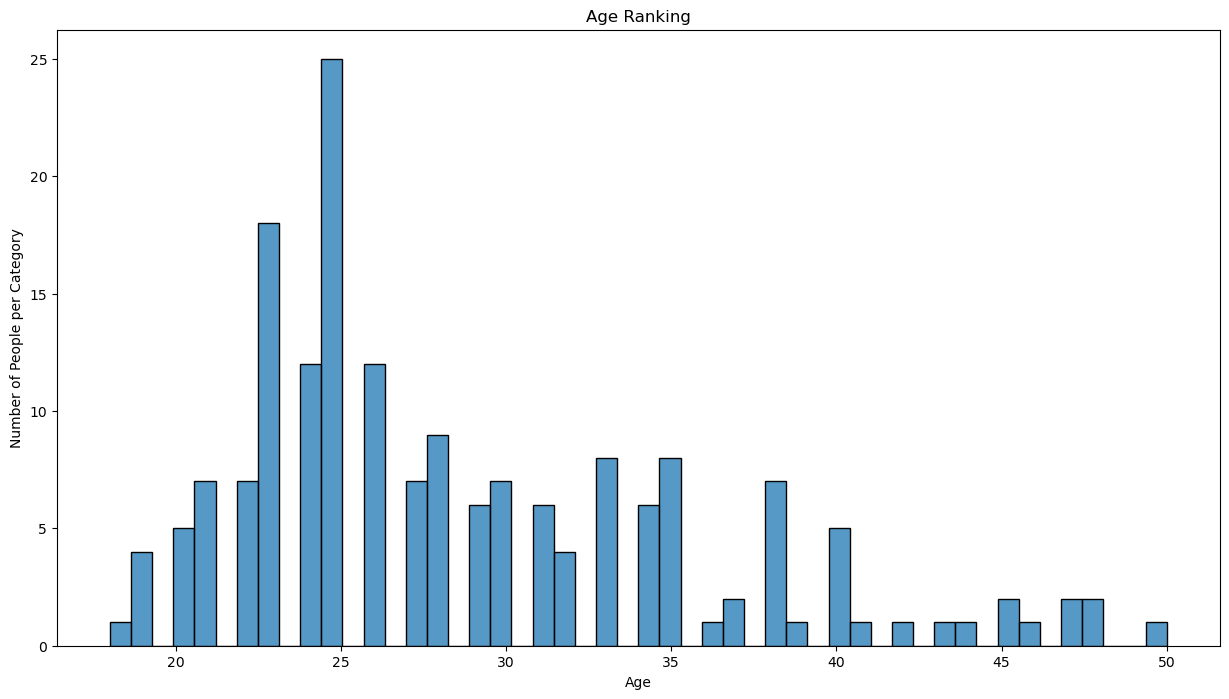

In [54]:
f, ax = plt.subplots(figsize=(15, 8))
sns.histplot(data=dataset, x='Age',  bins=50)
plt.title('Age Ranking')
plt.xlabel('Age')
plt.ylabel('Number of People per Category')
plt.show()

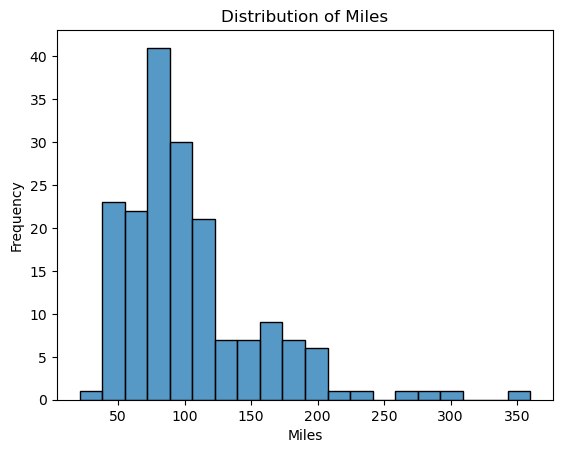

In [58]:
# create a histogram with 20 bins
sns.histplot(data=dataset , x='Miles', bins=20)

# set the title and labels
plt.title("Distribution of Miles")
plt.xlabel("Miles")
plt.ylabel("Frequency")

# display the plot
plt.show()

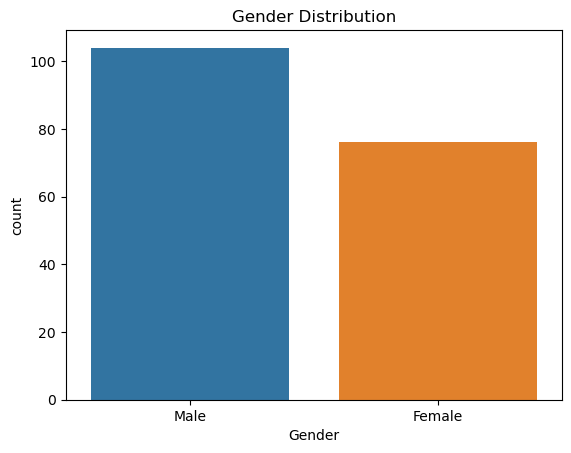

In [61]:
# create a countplot with 20 bins
sns.countplot(data=dataset , x='Gender')

# set the title and labels
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("count")

# display the plot
plt.show()

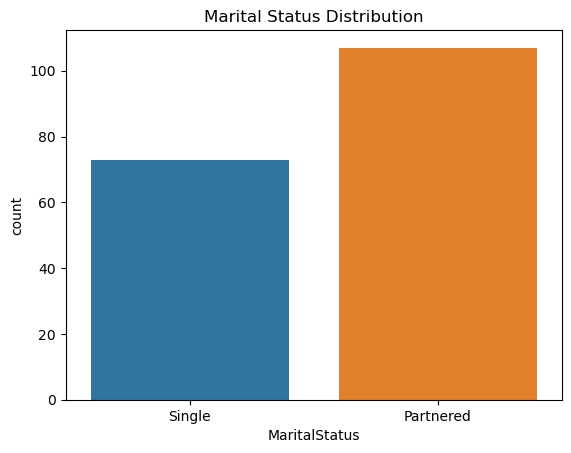

In [66]:
# create a countplot with 20 bins
sns.countplot(data=dataset , x='MaritalStatus')

# set the title and labels
plt.title("Marital Status Distribution")
plt.xlabel("MaritalStatus")
plt.ylabel("count")

# display the plot
plt.show()

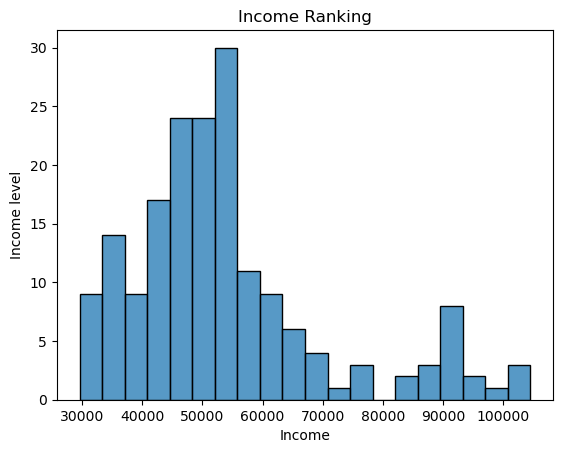

In [68]:
sns.histplot(data=dataset, x='Income',  bins=20)
plt.title('Income Ranking')
plt.xlabel('Income')
plt.ylabel('Income level')
plt.show()

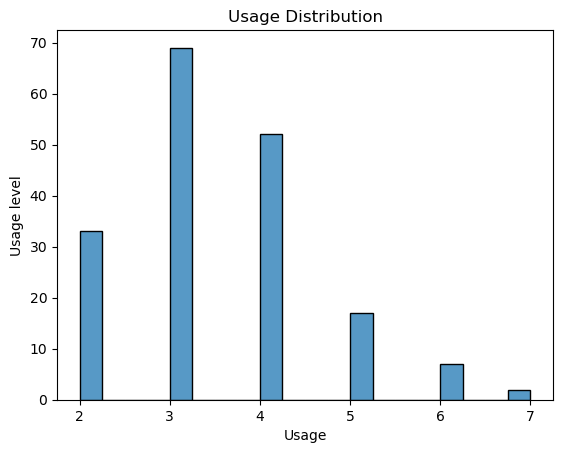

In [69]:
sns.histplot(data=dataset, x='Usage', bins=20)
plt.title('Usage Distribution')
plt.xlabel('Usage')
plt.ylabel('Usage level')
plt.show()

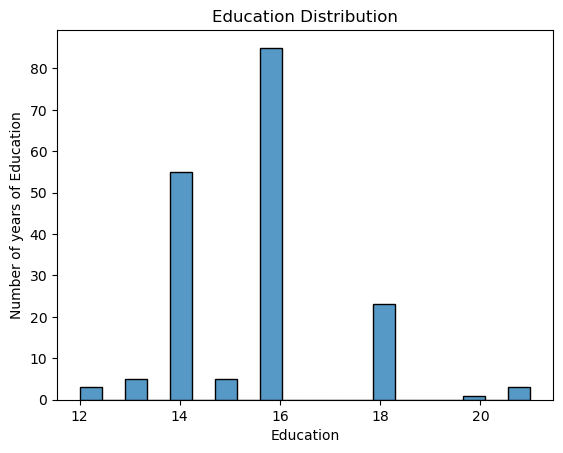

In [70]:
sns.histplot(data=dataset, x='Education', bins=20)
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Number of years of Education')
plt.show()

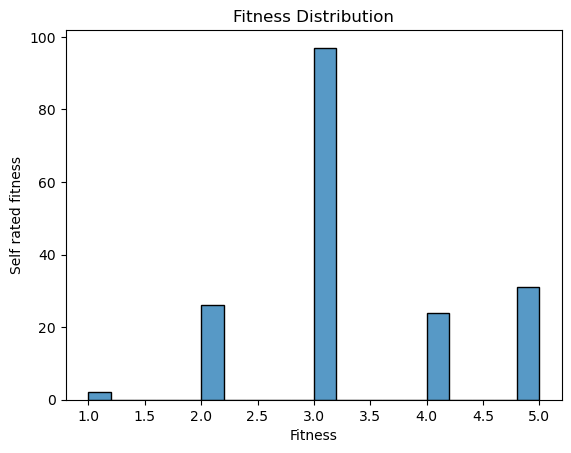

In [92]:
sns.histplot(data=dataset, x='Fitness', bins=20)
plt.title('Fitness Distribution')
plt.xlabel('Fitness')
plt.ylabel('Self rated fitness')
plt.show()

multivariate

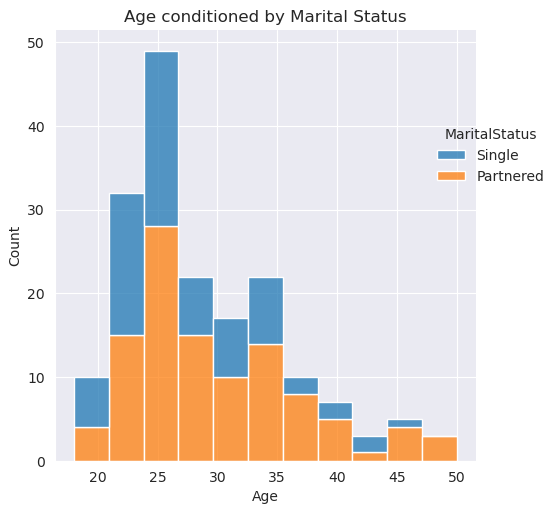

In [55]:
with sns.axes_style("darkgrid"):
    age_ms=sns.displot(data=dataset, x='Age', hue='MaritalStatus', multiple="stack" )
    sns.move_legend(age_ms,"upper left", bbox_to_anchor=(0.7, 0.8))
    plt.title("Age conditioned by Marital Status");
    plt.xlabel("Age")

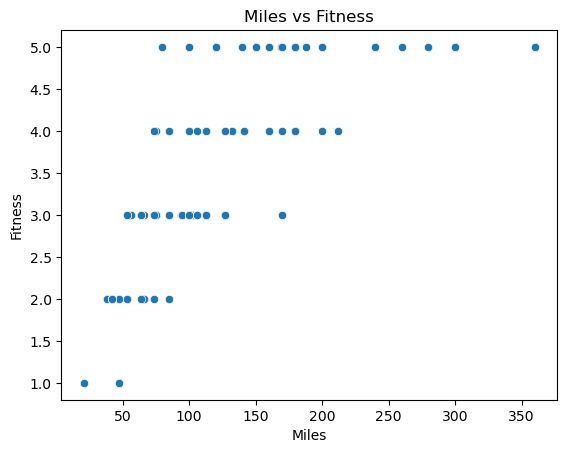

In [72]:
sns.scatterplot(x= "Miles", y= "Fitness", data=dataset)
plt.xlabel("Miles")
plt.ylabel("Fitness")
plt.title("Miles vs Fitness")
plt.show()

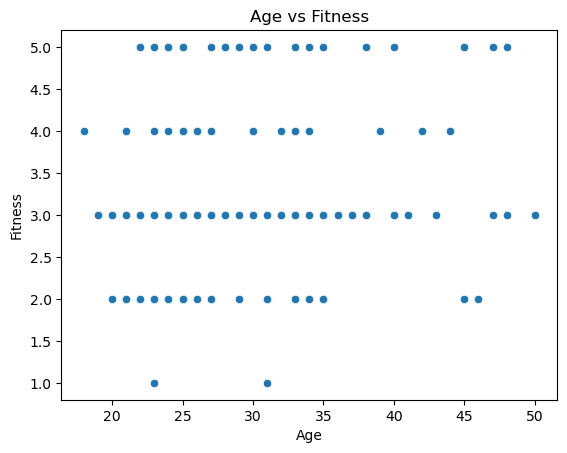

In [93]:
sns.scatterplot(x= "Age", y= "Fitness", data=dataset)
plt.xlabel("Age")
plt.ylabel("Fitness")
plt.title("Age vs Fitness")
plt.show()

Recommendation
There are more partnered users , it would be advisable for the company to create the TM195 products geared towards partners and they should also create gym options for partners to increase the number of users. It shows that usage for threadmill is thrice a week and Fitness level is also at 3 rating. Men came to the gym more so more muscle gym equipmemts should be invested in as more gym users are men.